# Getting Started

#### Predicting a dataset's (stocks) last 5% of data by the first 95%.

#### Used methods:
* **Autoregression**
* **ARIMA**
* **LTSM**

In [3]:
# Standard libaries for DataFrame, Dtypes & I/O
import numpy as np
import pandas as pd
import math
from datetime import timedelta

# Plotting: Seaborn, Matplotlib, Plotly, Bokeh
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
%matplotlib inline
pd.set_option('display.precision', 5)
# Plotly - graph_objects
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Bokeh
from bokeh.models.annotations import Title
from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import row
from bokeh.layouts import gridplot
from bokeh.plotting import figure, output_file

# EDA
# Profile Report
from pandas_profiling import ProfileReport
# Pandas Visual Analysis
from pandas_visual_analysis import VisualAnalysis

# Models
# AR - Autoregression
from statsmodels.tsa.ar_model import AR
# ARIMA - Autoregressive integrated moving average
from statsmodels.tsa.arima_model import ARIMA
# LSTM - Long Short Term Memory
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Warnings
import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'plotly'

### Used dataset: ibm.us.txt

In [4]:
# Converting Date(s) to DataTime
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')

# Reading .txt file - ibm.us.txt
# Indexing by Date(s)
data = pd.read_csv('ibm.us.txt', sep=',', parse_dates=['Date'], index_col='Date', date_parser=dateparse)

# Printing out the first 20 rows
data.head(20)

<ipython-input-4-d58cfcb0621c>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')


,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
1962-01-02,6.4130,6.4130,6.3378,6.3378,467056,0
1962-01-03,6.3378,6.3963,6.3378,6.3963,350294,0
1962-01-04,6.3963,6.3963,6.3295,6.3295,314365,0
1962-01-05,6.3211,6.3211,6.1958,6.2041,440112,0
1962-01-08,6.2041,6.2041,6.0373,6.0870,655676,0
1962-01-09,6.1208,6.2376,6.1208,6.1621,592806,0
1962-01-10,6.1707,6.2041,6.1707,6.1707,359274,0
1962-01-11,6.1875,6.2376,6.1875,6.2376,386220,0
1962-01-12,6.2543,6.2962,6.2543,6.2543,529933,0


In [5]:
# Checking data types
#data.dtypes

# General statistics about the Dataframe
data.describe()

,Open,High,Low,Close,Volume,OpenInt
count,14059.00000,14059.00000,14059.00000,14059.0000,1.40590e+04,14059.0
mean,48.53555,48.98746,48.11190,48.5542,5.78297e+06,0.0
std,49.27097,49.66377,48.91263,49.2977,5.42953e+06,0.0
min,3.39010,3.56550,3.32350,3.3901,0.00000e+00,0.0
25%,13.23850,13.35800,13.14500,13.2340,1.47159e+06,0.0
50%,23.02900,23.21300,22.81900,23.0290,4.80184e+06,0.0
75%,77.38350,78.15400,76.74350,77.4445,8.22484e+06,0.0
max,186.01000,186.46000,185.06000,186.3600,8.31659e+07,0.0


In [6]:
first_record = min(data.index)
last_record = max(data.index)
total_days = (last_record - first_record).days

# Total number of days
print('We have data from a total of', total_days, 'days.')   
training_days = np.ceil(total_days * 0.95)
test_days = np.floor(total_days * (1 - 0.95))

print('We are going to the data of', int(training_days), 'days for training and', int(test_days), 'days for testing.')
date_split = first_record + timedelta(days=training_days)
print('The train set goes from ' + str(first_record.year) + '-' + str(first_record.month) + '-' + str(first_record.day) + ' to ' + str(date_split.year) + '-' + str(date_split.month) + '-' + str(date_split.day))
print('The last day included in the training set is: ')

print(first_record)
print(last_record)

We have data from a total of 20401 days.
We are going to the data of 19381 days for training and 1020 days for testing.
The train set goes from 1962-1-2 to 2015-1-25
The last day included in the training set is: 
1962-01-02 00:00:00
2017-11-10 00:00:00


In [7]:
# Plotting IBM data between 1962-2017
# Making the subplots
fig = make_subplots(rows=4, cols=1, start_cell="top-left", shared_xaxes=True, shared_yaxes=True, row_titles=["Open", "High", "Low", "Close"])

# Creating plots
fig.add_trace(go.Scatter(x=data.index, y=data['Open'], name="Open"), row=1, col=1)
fig.add_trace(go.Scatter(x=data.index, y=data['High'], name="High"), row=2, col=1)
fig.add_trace(go.Scatter(x=data.index, y=data['Low'], name="Low"), row=3, col=1)
fig.add_trace(go.Scatter(x=data.index, y=data['Close'], name="Close"), row=4, col=1)

# Update size and title
fig.update_layout(autosize=True, width=1450, height=825, hovermode='x unified',
    title_font=dict(size=25, family='Courier', color='crimson'),
    title="Stock prices",
)

# Update yaxis properties
fig.update_yaxes(title_text="Open Price ($)", row=1, col=1)
fig.update_yaxes(title_text="High Price ($)", row=2, col=1)
fig.update_yaxes(title_text="Low Price ($)", row=3, col=1)
fig.update_yaxes(title_text="Close Price ($)", row=4, col=1)

fig.show()

NameError: name 'make_subplots' is not defined

In [8]:
# Dividing data
train_data, test_data = data[0:math.floor(len(data)*0.95)], data[math.floor(len(data)*0.95):]

# Plotting autoregression result
# Making the subplots
fig = make_subplots(rows=4, cols=1, start_cell="top-left", shared_xaxes=True, shared_yaxes=True, row_titles=["Open", "High", "Low", "Close"])

# Creating plots
fig.add_trace(go.Scatter(x=train_data.index, y=train_data['Open'], name="Train Data"), row=1, col=1)
fig.add_trace(go.Scatter(x=test_data.index, y=test_data['Open'], name="Test Data"), row=1, col=1)
fig.add_trace(go.Scatter(x=train_data.index, y=train_data['High'], name="Train Data"), row=2, col=1)
fig.add_trace(go.Scatter(x=test_data.index, y=test_data['High'], name="Test Data"), row=2, col=1)
fig.add_trace(go.Scatter(x=train_data.index, y=train_data['Low'], name="Train Data"), row=3, col=1)
fig.add_trace(go.Scatter(x=test_data.index, y=test_data['Low'], name="Test Data"), row=3, col=1)
fig.add_trace(go.Scatter(x=train_data.index, y=train_data['Close'], name="Train Data"), row=4, col=1)
fig.add_trace(go.Scatter(x=test_data.index, y=test_data['Close'], name="Test Data"), row=4, col=1)

# Update size and title
fig.update_layout(autosize=True, width=1450, height=825, hovermode='x unified',
    title_font=dict(size=25, family='Courier', color='crimson'),
    title="Stock prices",
)

# Update yaxis properties
fig.update_yaxes(title_text="Open Price ($)", row=1, col=1)
fig.update_yaxes(title_text="High Price ($)", row=2, col=1)
fig.update_yaxes(title_text="Low Price ($)", row=3, col=1)
fig.update_yaxes(title_text="Close Price ($)", row=4, col=1)

fig.show()

NameError: name 'make_subplots' is not defined

# ARIMA

In [9]:
from sklearn.metrics import mean_absolute_error
from pylab import rcParams
rcParams['figure.figsize'] = 25, 8

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

data_arima = train_data['Close']

Date
1962-01-02      6.3378
1962-01-03      6.3963
1962-01-04      6.3295
1962-01-05      6.2041
1962-01-08      6.0870
                ...   
2015-01-23    139.9600
2015-01-26    140.4200
2015-01-27    137.9900
2015-01-28    136.0900
2015-01-29    139.6300
Name: Close, Length: 13356, dtype: float64

<ipython-input-10-80427b160959>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(data_arima, model='multiplicative', freq=365)


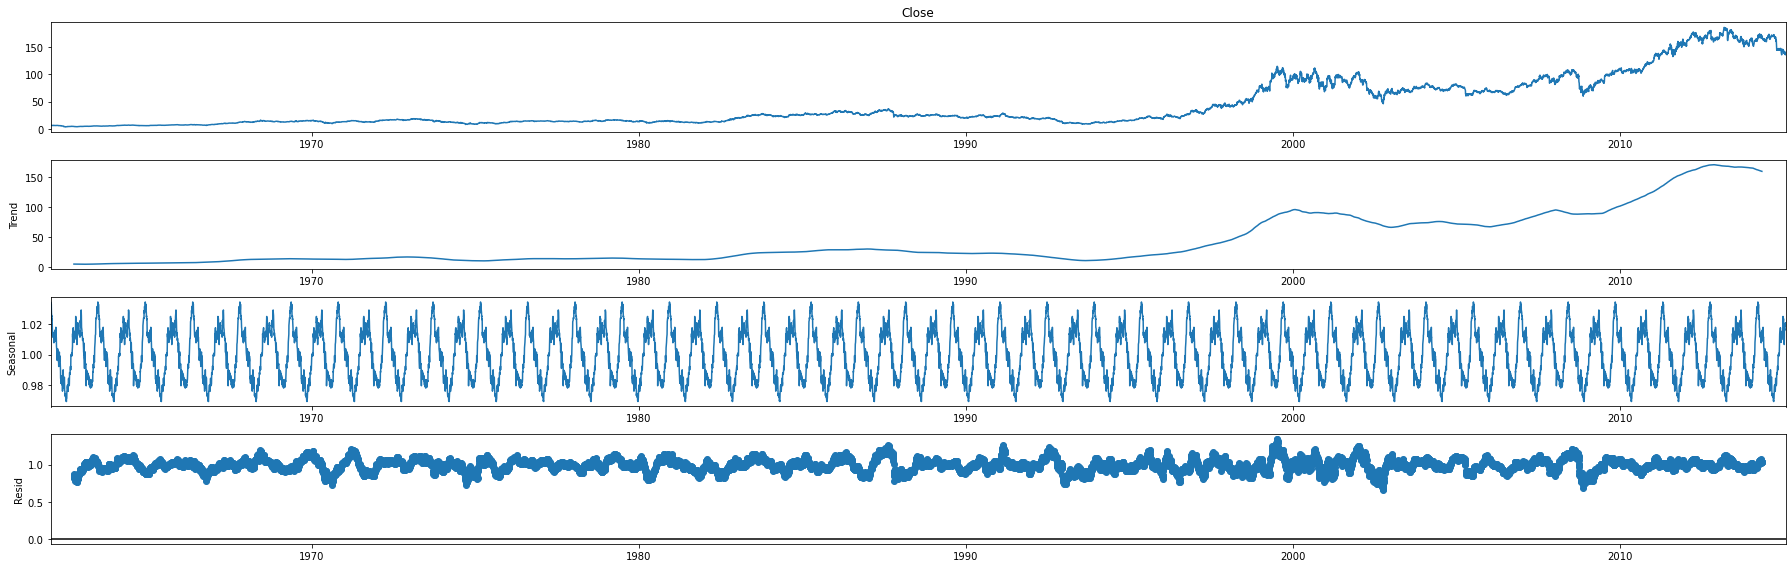

In [10]:
result = seasonal_decompose(data_arima, model='multiplicative', freq=365)
fig = result.plot()
plt.show()

In [13]:
from pylab import rcParams
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
train_arima = train_data['Close']
test_arima = test_data['Close']

history = [x for x in train_arima]
y = test_arima

# Make first prediction
predictions = list()
model = ARIMA(history, order=(0, 1, 0))
model_fit = model.fit(disp=0)
yhat = model_fit.forecast()[0][0]
predictions.append(yhat)
history.append(y[0])

# Rolling forecasts
for i in range(1, len(y)):
     # Predict
     model = ARIMA(history, order=(0, 1, 0))
     model_fit = model.fit(disp=0)
     yhat = model_fit.forecast()[0][0]
     # Invert transformed prediction
     predictions.append(yhat)
     # Observation
     obs = y[i]
     history.append(obs)

# Report performance
mse = mean_squared_error(y, predictions)
print('MSE: ' + str(mse))
mae = mean_absolute_error(y, predictions)
print('MAE: ' + str(mae))
rmse = math.sqrt(mean_squared_error(y, predictions))
print('RMSE: ' + str(rmse))

C:\Users\34689\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\34689\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

MSE: 2.9238257808801977
MAE: 1.1858910984951034
RMSE: 1.709919817090906


In [12]:
# Plotting ARIMA result
fig = go.Figure()

fig.add_trace(go.Scatter(x=train_data.index[-250:], y=train_data['Close'].tail(250), mode='lines', name='Price'))
fig.add_trace(go.Scatter(x=test_data.index, y=test_data['Close'], mode='lines', name='Test price'))
fig.add_trace(go.Scatter(x=test_data.index, y=predictions, mode='lines', name='Predicted price'))

fig.update_layout(autosize=True, width=1450, height=825, hovermode='x unified',
    title_font=dict(size=25, family='Courier', color='crimson'),
    title="ARIMA prediction - Close Price",
)

fig.show()

# LSTM - Long Short Term Memory

In [13]:
# LSTM - Long Short Term Memory
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU
from keras.layers import Dropout

# Convert the dataframe to a numpy array
lstm_data = data.filter(['Close'])
lstm_dataset = lstm_data.values

# Get the number of rows to train the model on
training_data_len = math.ceil(len(lstm_dataset) * 0.95)

# Scale data - preproccesing 
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(lstm_dataset)

scaled_data

array([[0.0161103 ],
       [0.01643002],
       [0.01606494],
       ...,
       [0.80166137],
       [0.8029184 ],
       [0.79668787]])

In [14]:
# Create the training dataset
# Crate the scaled training data set
train_data = scaled_data[0: training_data_len, :]

# Split the data into x_train and y_train data sets

x_train = [] # Independent training varriables, training features
y_train = [] # Depedent varriables, target varriables

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
#x_train.shape

# Reshape the data - LSTM expects the input to be 3D (Currently: 2D)
# Number of samples = number of rows
# Number of time steps = 60
# Number of features = 1 (Close price)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) # Features 

In [15]:
# Build the LSTM model
model = Sequential()

# Layers
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train/fit the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/100
 6078/13297 [============>.................] - ETA: 8:55 - loss: 7.3646e-04

In [1]:
# Creating the testing data
test_data = scaled_data[training_data_len - 60: , :]

# Creating the data sets: x_test and y_test
x_test = []
y_test = lstm_dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)
#x_test.shape

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1)) 

#  Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) # Unscaling the data

NameError: name 'scaled_data' is not defined

In [ ]:
# Report performance
# MSE - Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print('MSE: '+ str(mse))
# MSE - Mean Absolute Error
mae = mean_absolute_error(y_test, predictions)
print('MAE: '+ str(mae))
# RMSE - Root Mean Squared Error
rmse = math.sqrt(mean_squared_error(y_test, predictions))
print('RMSE: '+ str(rmse))

&lt;matplotlib.legend.Legend at 0x1729424a2c8&gt;

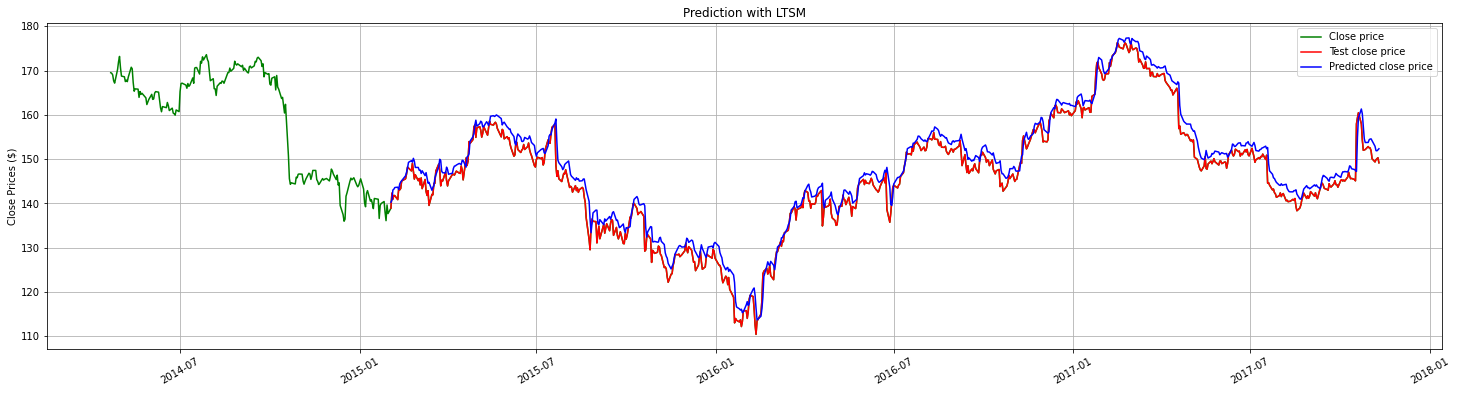

In [21]:
# Plotting LSTM result
fig = go.Figure()

fig.add_trace(go.Scatter(x=train_data.index[-250:], y=train_data['Close'].tail(250), mode='lines', name='Price'))
fig.add_trace(go.Scatter(x=test_data.index, y=test_data['Close'], mode='lines', name='Test price'))
fig.add_trace(go.Scatter(x=test_data.index, y=predictions, mode='lines', name='Predicted price'))

fig.update_layout(autosize=True, width=1450, height=825, hovermode='x unified',
    title_font=dict(size=25, family='Courier', color='crimson'),
    title="LSTM prediction - Close Price",
)